**Personality classification ANN 98%**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('/content/16P.csv', encoding='latin-1')
data.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [4]:
data.shape


(59999, 62)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [6]:
data.drop('Response Id',axis=1,inplace=True)

In [7]:
new = ['Q'+str(i) for i in range(1,len(data.columns))]
new.append('Personality')
data.columns = new
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [8]:
data.isnull().sum().sort_values(ascending=False)

,0
Q1,0
Q32,0
Q34,0
Q35,0
Q36,0
...,...
Q26,0
Q27,0
Q28,0
Q29,0


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,59999.0,-0.000867,0.365701,-2.0,0.0,0.0,0.0,1.0
Q2,59999.0,-0.000467,0.364652,-1.0,0.0,0.0,0.0,1.0
Q3,59999.0,0.000267,1.527343,-3.0,-1.0,0.0,1.0,3.0
Q4,59999.0,-0.232887,1.502173,-3.0,-1.0,0.0,1.0,3.0
Q5,59999.0,-0.175653,1.502999,-3.0,-1.0,0.0,1.0,3.0
Q6,59999.0,0.005317,1.521413,-3.0,-1.0,0.0,1.0,3.0
Q7,59999.0,-0.476558,1.445931,-3.0,-2.0,-1.0,0.0,3.0
Q8,59999.0,-0.000550,0.367361,-1.0,0.0,0.0,0.0,2.0
Q9,59999.0,0.126819,1.537329,-3.0,-1.0,0.0,1.0,3.0
Q10,59999.0,-0.003283,0.367347,-1.0,0.0,0.0,0.0,1.0


In [10]:
X = data.drop('Personality', axis=1)
y = data['Personality']

In [11]:
classes=['ESTJ', 'ENTJ', 'ESFJ', 'ENFJ', 'ISTJ', 'ISFJ', 'INTJ', 'INFJ', 'ESTP', 'ESFP', 'ENTP', 'ENFP', 'ISTP', 'ISFP', 'INTP', 'INFP']

In [12]:
personality_mapping = {
    'ESTJ': 0,
    'ENTJ': 1,
    'ESFJ': 2,
    'ENFJ': 3,
    'ISTJ': 4,
    'ISFJ': 5,
    'INTJ': 6,
    'INFJ': 7,
    'ESTP': 8,
    'ESFP': 9,
    'ENTP': 10,
    'ENFP': 11,
    'ISTP': 12,
    'ISFP': 13,
    'INTP': 14,
    'INFP': 15
}


y = y.map(personality_mapping)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , stratify=y , random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(47999, 60) (12000, 60) (47999,) (12000,)


**ANN** **Model**

In [14]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=x_train.shape[1], kernel_regularizer=l2(0.001)))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,672 (72.94 KB)

 Trainable params: 18,672 (72.94 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7874 - loss: 1.0064 - val_accuracy: 0.9767 - val_loss: 0.3348
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9779 - loss: 0.3209 - val_accuracy: 0.9811 - val_loss: 0.2752
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9813 - loss: 0.2703 - val_accuracy: 0.9821 - val_loss: 0.2494
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9823 - loss: 0.2458 - val_accuracy: 0.9836 - val_loss: 0.2304
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9838 - loss: 0.2283 - val_accuracy: 0.9830 - val_loss: 0.2279
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9831 - loss: 0.2178 - val_accuracy: 0.9837 - val_loss: 0.2122
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9848 - loss: 0.2081 - val_accuracy: 0.9831 - val_loss: 0.2122
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9842 - loss: 

**model evaluation**

In [16]:
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Train Loss: {loss:.4f}')
print(f'Train Accuracy: {accuracy:.4f}')

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.1246
Train Loss: 0.1276
Train Accuracy: 0.9869


In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9788 - loss: 0.1791
Test Loss: 0.1722
Test Accuracy: 0.9788


Accuracy on the validation set gives a good measure of the model’s ability to generalize to new data.

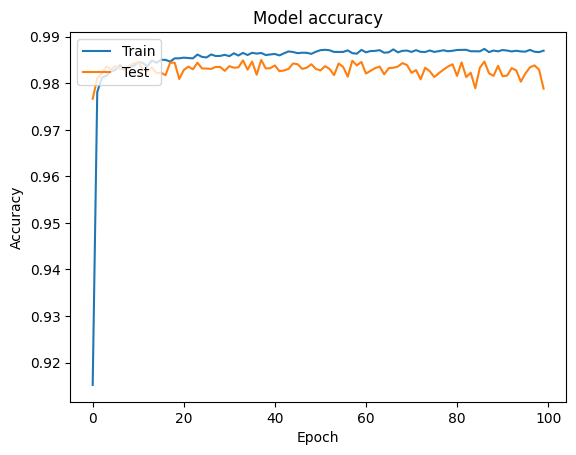

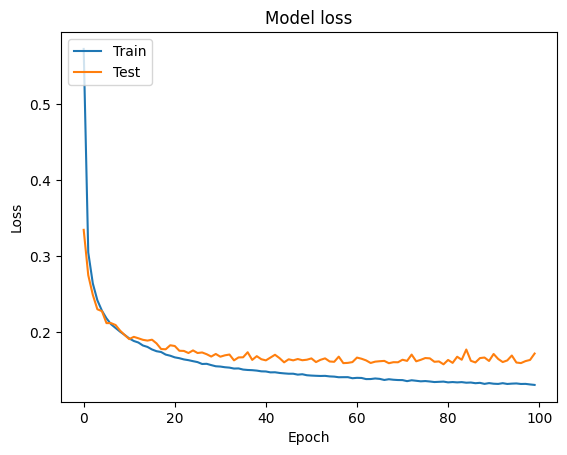

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_classes)
print(report)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       752
           1       0.98      0.97      0.97       747
           2       0.98      0.99      0.98       749
           3       0.98      0.99      0.98       749
           4       0.97      0.98      0.98       751
           5       0.98      0.97      0.97       748
           6       0.98      0.97      0.98       749
           7       0.99      0.98      0.98       752
           8       0.98      0.99      0.98       750
           9       0.98      0.98      0.98       754
          10       0.97      0.99      0.98       752
          11       0.99      0.98      0.98       752
          12       0.99      0.97      0.98       751
          13       0.97      0.96      0.97       749
          14       0.97      0.99      0.98       748
          15       0.97      0.98      0.97       747

    accuracy                           

**saving model**

In [20]:
model.save('Personality_Model.h5')